In [275]:
pip install virtualenv

Note: you may need to restart the kernel to use updated packages.


In [276]:
pip install tensorflow

In [277]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import tree 
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import hist
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.neighbors import KNeighborsRegressor


In [278]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from numpy.random import seed
from tensorflow import keras
from tensorflow.keras import layers
import joblib
%matplotlib inline

In [279]:
#Объединение таблиц с данными
x_bp_df = pd.read_excel('X_bp.xlsx')
x_nup_df = pd.read_excel('X_nup.xlsx')
merged_data = x_bp_df.merge(x_nup_df, left_index=True, right_index=True, how='inner')

In [280]:
merged_data = merged_data.rename(columns={'Unnamed: 0': 'index', 
                                  'Соотношение матрица-наполнитель': 'matrix_litter_ratio', 
                                  'Плотность, кг/м3': 'density_kg/m3', 
                                  'модуль упругости, ГПа': 'elasticity_modulus_GPa', 
                                  'Количество отвердителя, м.%': 'hardener_quantity_m%', 
                                  'Содержание эпоксидных групп,%_2': 'epoxy_group_amount_%', 
                                  'Температура вспышки, С_2': 'flash_T_С_2', 
                                  'Поверхностная плотность, г/м2': 'surface_density_g/m2', 
                                  'Модуль упругости при растяжении, ГПа': 'mod_of_elast_under_tension_GPa', 
                                  'Прочность при растяжении, МПа': 'strength_under_tension_MPa', 
                                  'Потребление смолы, г/м2': 'resin_consumption_g/m2', 
                                  'Угол нашивки, град': 'patch_angle_degree', 
                                  'Шаг нашивки': 'patch_step', 
                                  'Плотность нашивки': 'patch_density'})

In [281]:
merged_data.head(5)

,Unnamed: 0_x,matrix_litter_ratio,density_kg/m3,elasticity_modulus_GPa,hardener_quantity_m%,epoxy_group_amount_%,flash_T_С_2,surface_density_g/m2,mod_of_elast_under_tension_GPa,strength_under_tension_MPa,resin_consumption_g/m2,Unnamed: 0_y,patch_angle_degree,patch_step,patch_density
0,0.0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0.0,0.0,4.0,57.0
1,1.0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,1.0,0.0,4.0,60.0
2,2.0,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,2.0,0.0,4.0,70.0
3,3.0,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,3.0,0.0,5.0,47.0
4,4.0,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,4.0,0.0,5.0,57.0


In [282]:
merged_data.drop(columns = ['Unnamed: 0_x', 'Unnamed: 0_y'],axis = 1, inplace=True)

In [283]:
#Общая информация о датасете
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   matrix_litter_ratio             1023 non-null   float64
 1   density_kg/m3                   1023 non-null   float64
 2   elasticity_modulus_GPa          1023 non-null   float64
 3   hardener_quantity_m%            1023 non-null   float64
 4   epoxy_group_amount_%            1023 non-null   float64
 5   flash_T_С_2                     1023 non-null   float64
 6   surface_density_g/m2            1023 non-null   float64
 7   mod_of_elast_under_tension_GPa  1023 non-null   float64
 8   strength_under_tension_MPa      1023 non-null   float64
 9   resin_consumption_g/m2          1023 non-null   float64
 10  patch_angle_degree              1023 non-null   float64
 11  patch_step                      1023 non-null   float64
 12  patch_density                   10

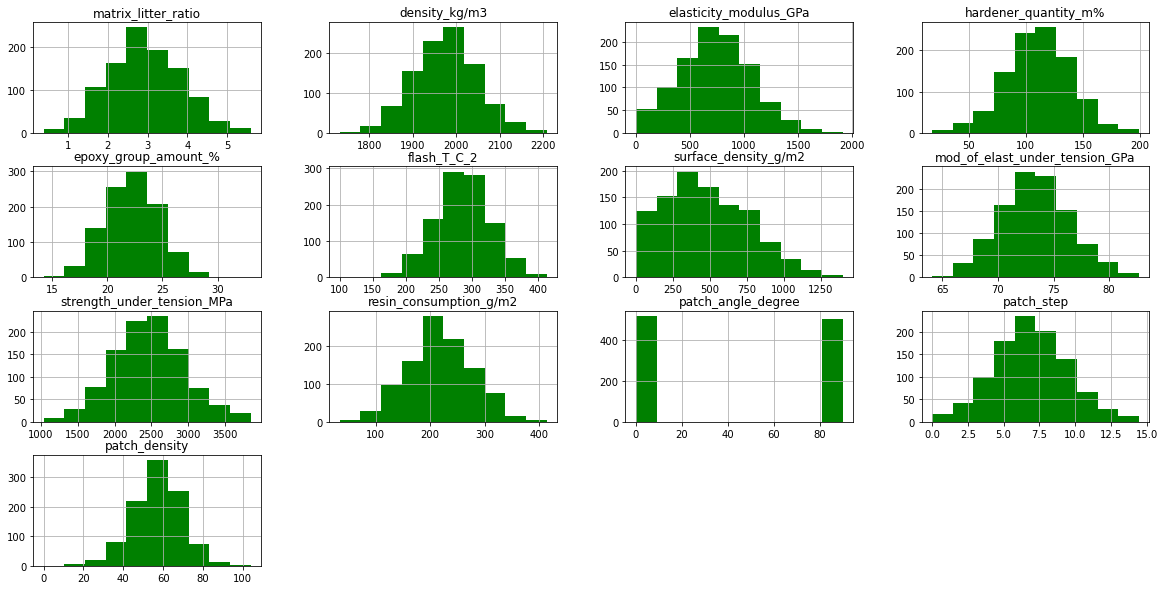

In [284]:
#Гистограмма для переменных
merged_data.hist(figsize=(20,10), color='green');
   

In [285]:
#Описание данных
merged_data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
matrix_litter_ratio,1023.0,2.93,0.91,0.39,2.32,2.91,3.55,5.59
density_kg/m3,1023.0,1975.73,73.73,1731.76,1924.16,1977.62,2021.37,2207.77
elasticity_modulus_GPa,1023.0,739.92,330.23,2.44,500.05,739.66,961.81,1911.54
hardener_quantity_m%,1023.0,110.57,28.30,17.74,92.44,110.56,129.73,198.95
epoxy_group_amount_%,1023.0,22.24,2.41,14.25,20.61,22.23,23.96,33.00
flash_T_С_2,1023.0,285.88,40.94,100.00,259.07,285.90,313.00,413.27
surface_density_g/m2,1023.0,482.73,281.31,0.60,266.82,451.86,693.23,1399.54
mod_of_elast_under_tension_GPa,1023.0,73.33,3.12,64.05,71.25,73.27,75.36,82.68
strength_under_tension_MPa,1023.0,2466.92,485.63,1036.86,2135.85,2459.52,2767.19,3848.44
resin_consumption_g/m2,1023.0,218.42,59.74,33.80,179.63,219.20,257.48,414.59


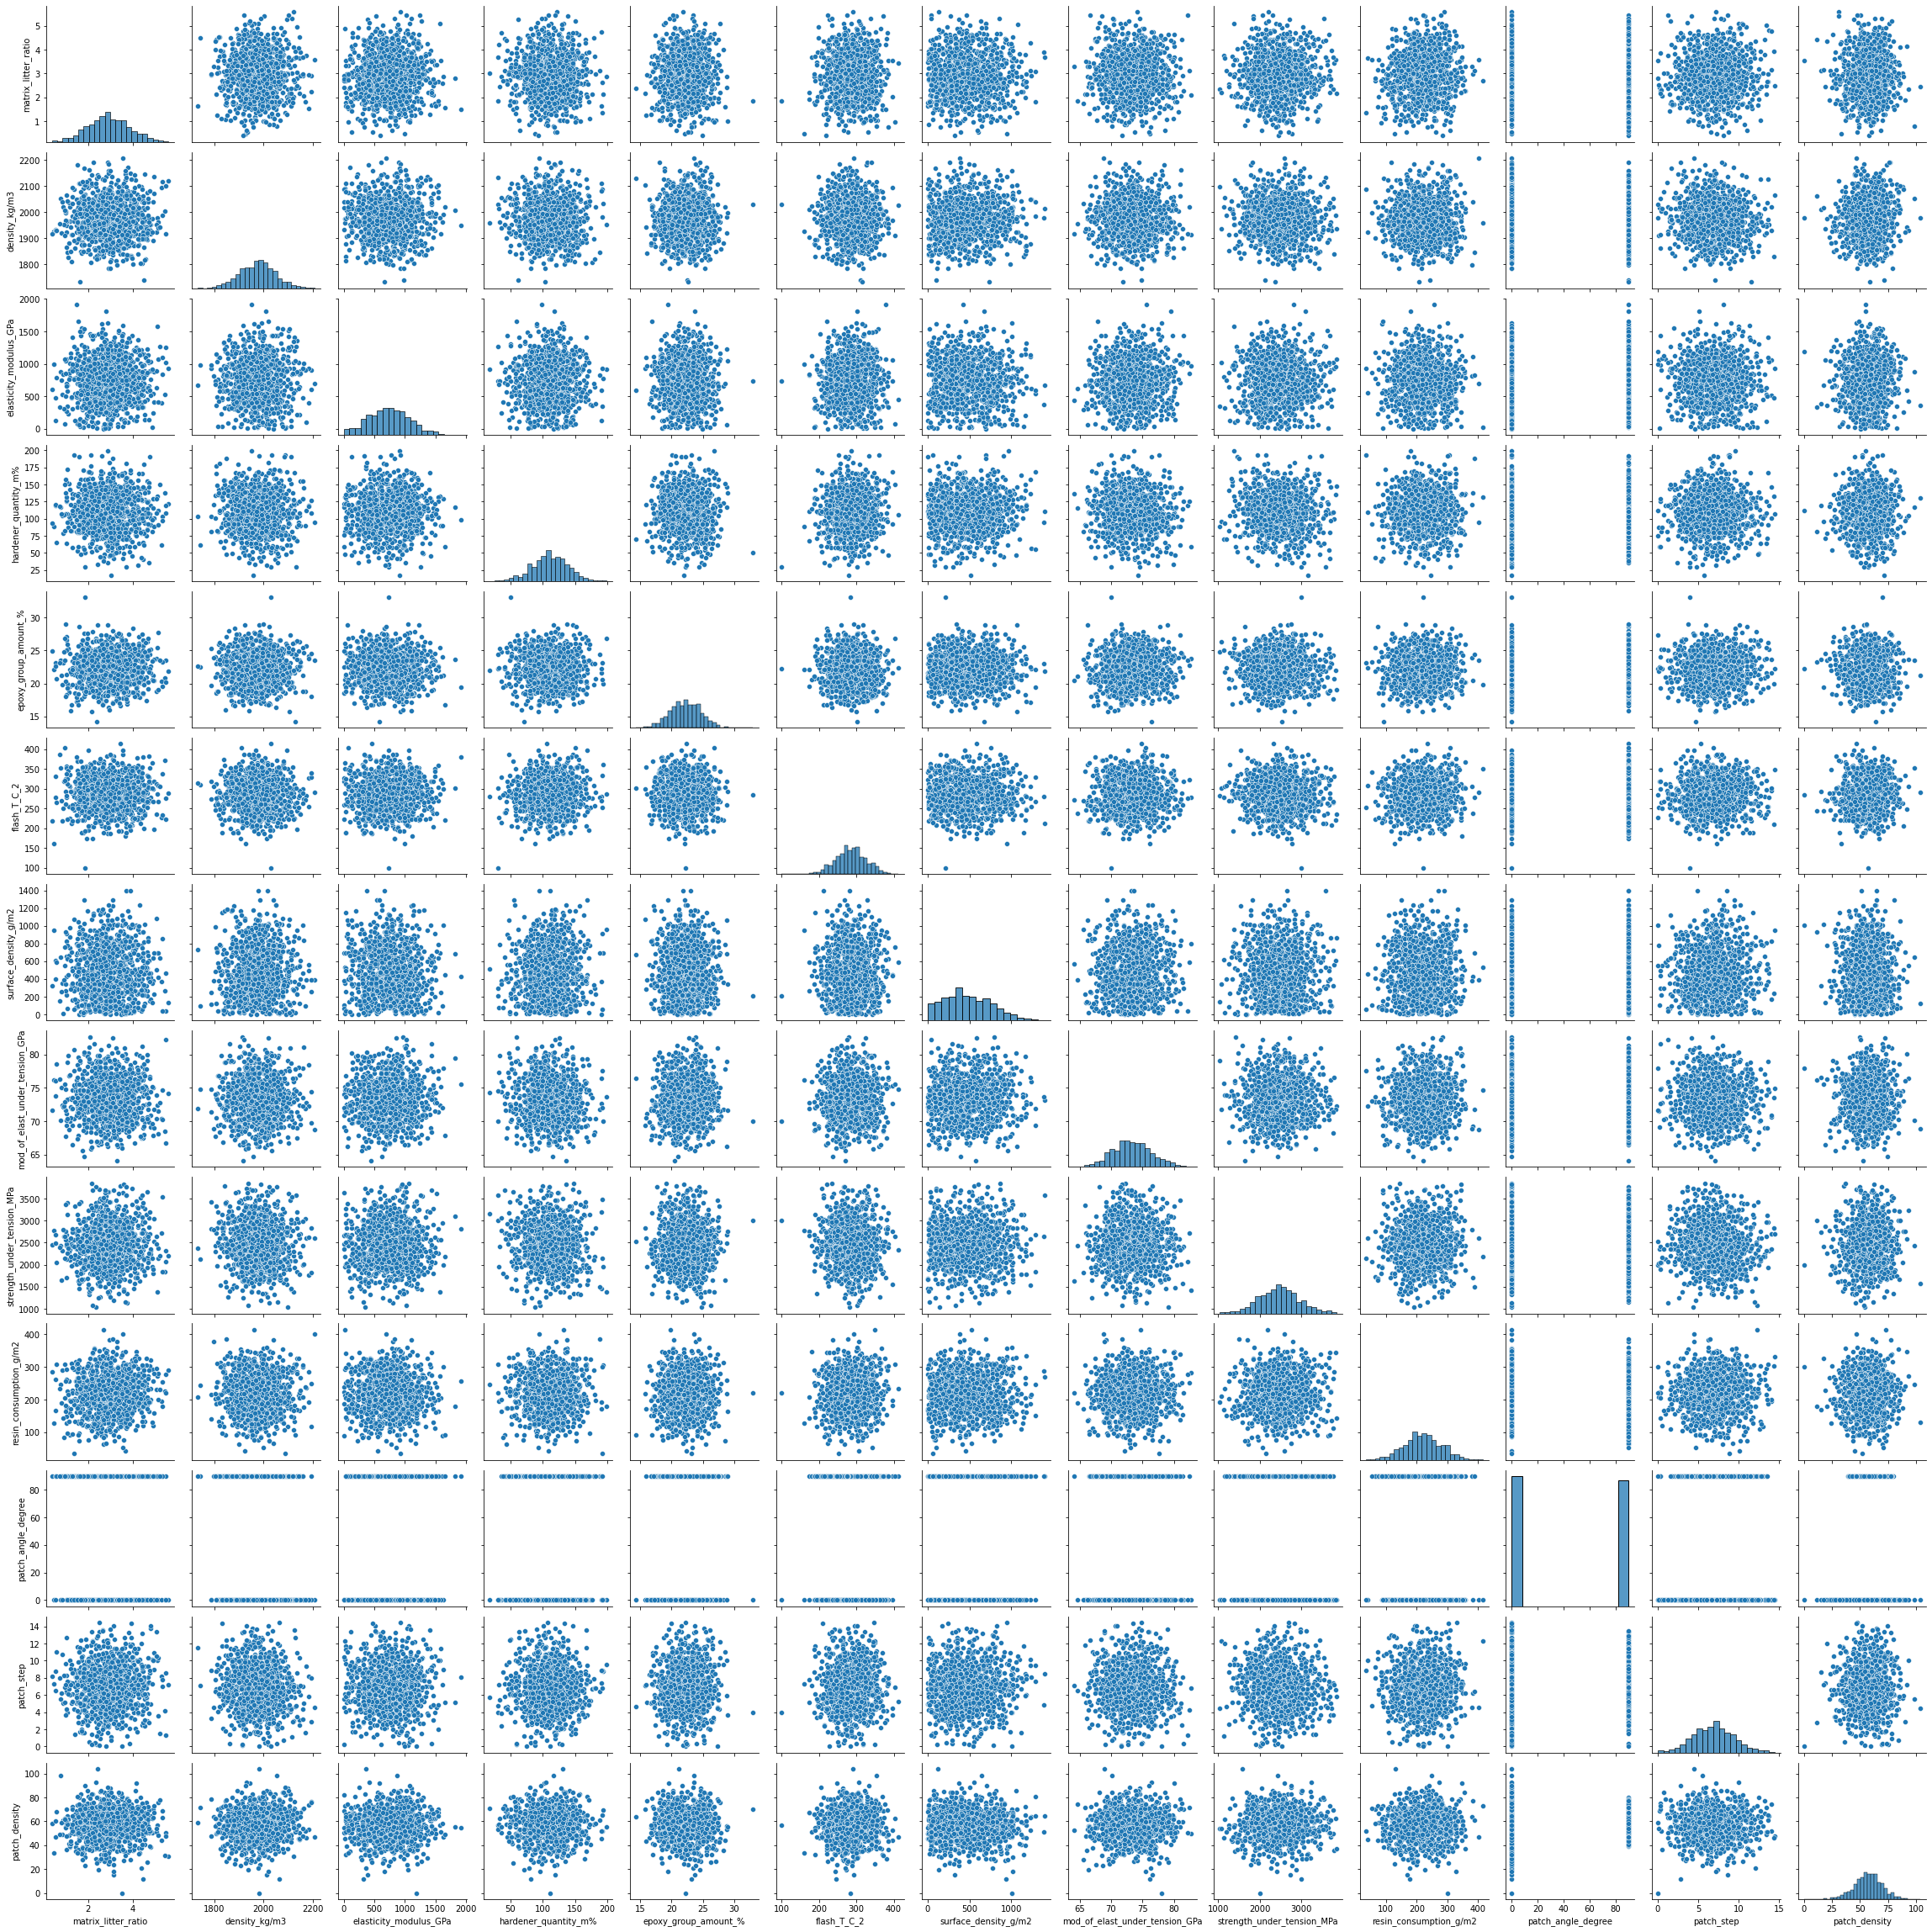

In [286]:
#Попарные графики рассеивания
sns.pairplot(merged_data, height=2.5)

<AxesSubplot:>

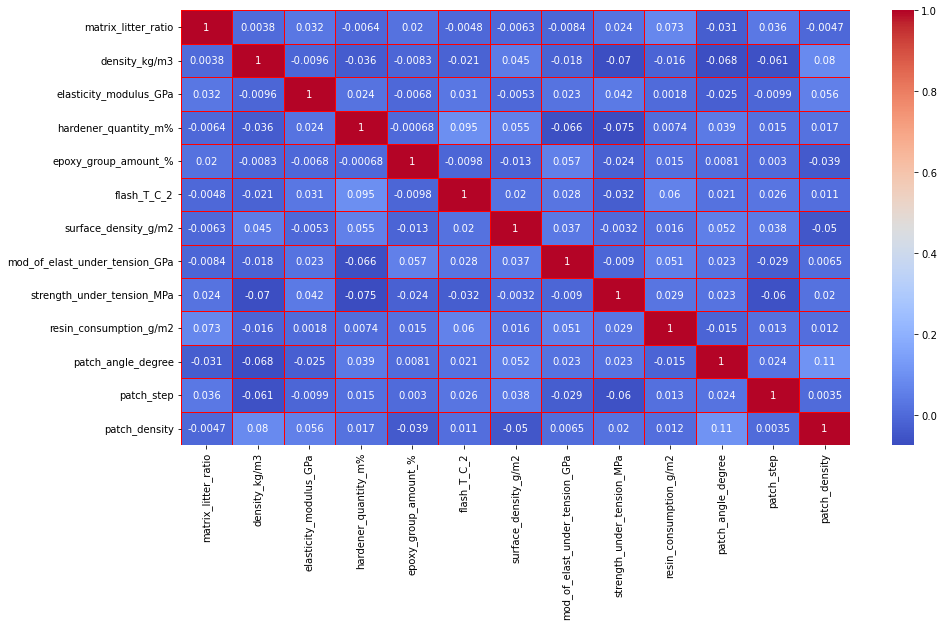

In [287]:
#Визуализация корреляции между переменными
plt.figure(figsize = (15, 8))
sns.heatmap(merged_data.corr(), cmap = 'coolwarm', annot = True, linewidths=1, linecolor='red')

In [288]:
#Нормализация
data_scaled = preprocessing.MinMaxScaler().fit_transform(merged_data)

In [289]:
data_scaled = pd.DataFrame(data_scaled, columns = list(merged_data.columns))

In [290]:
data_scaled.head(5)

,matrix_litter_ratio,density_kg/m3,elasticity_modulus_GPa,hardener_quantity_m%,epoxy_group_amount_%,flash_T_С_2,surface_density_g/m2,mod_of_elast_under_tension_GPa,strength_under_tension_MPa,resin_consumption_g/m2,patch_angle_degree,patch_step,patch_density
0,0.282131,0.626533,0.385679,0.067654,0.427467,0.000000,0.149682,0.319194,0.698235,0.488979,0.0,0.276998,0.548135
1,0.282131,0.626533,0.385679,0.178021,0.506535,0.589311,0.149682,0.319194,0.698235,0.488979,0.0,0.276998,0.576985
2,0.282131,0.626533,0.385679,0.177469,1.000000,0.589311,0.149682,0.319194,0.698235,0.488979,0.0,0.276998,0.673149
3,0.282131,0.626533,0.385679,0.613972,0.373167,0.638420,0.149682,0.319194,0.698235,0.488979,0.0,0.346248,0.451971
4,0.457857,0.626533,0.393150,0.519387,0.427467,0.589311,0.149682,0.319194,0.698235,0.488979,0.0,0.346248,0.548135


<AxesSubplot:>

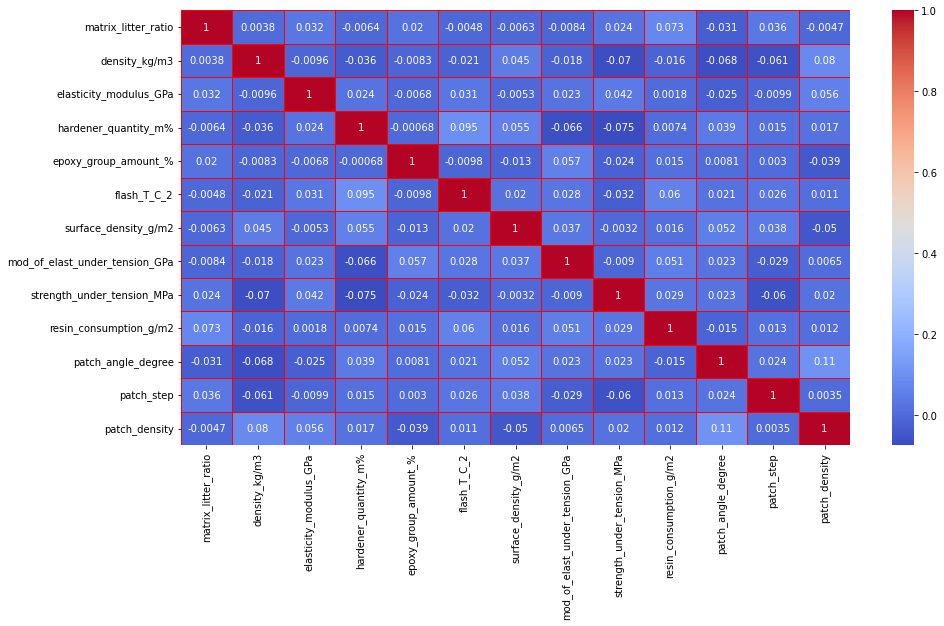

In [291]:
#Визуализация корреляции между переменными после нормализации
plt.figure(figsize = (15, 8))
sns.heatmap(data_scaled.corr(), cmap = "coolwarm", annot = True, linewidths=1, linecolor='red')

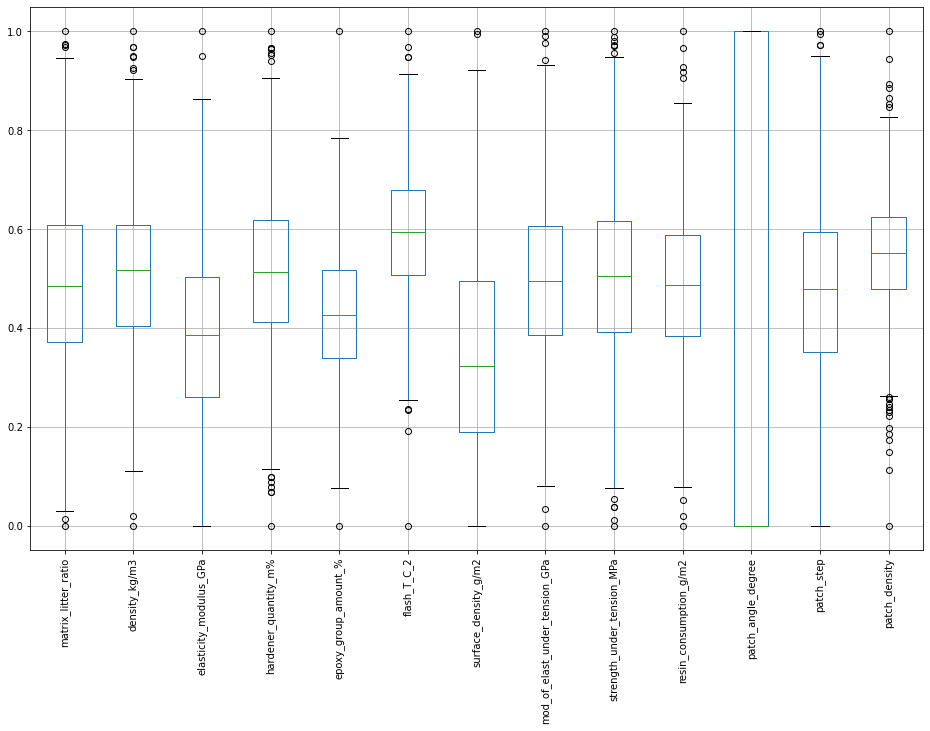

In [292]:
#Ящик с усами для переменных
boxplot = data_scaled.boxplot(rot=90, figsize=(16,10))

In [293]:
#Анализ и удаление выбросов
for x in data_scaled:
    q75,q25 = np.percentile(data_scaled.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data_scaled.loc[data_scaled[x] < min,x] = np.nan
    data_scaled.loc[data_scaled[x] > max,x] = np.nan
data_scaled.isnull().sum()

matrix_litter_ratio                6
density_kg/m3                      9
elasticity_modulus_GPa             2
hardener_quantity_m%              14
epoxy_group_amount_%               2
flash_T_С_2                        8
surface_density_g/m2               2
mod_of_elast_under_tension_GPa     6
strength_under_tension_MPa        11
resin_consumption_g/m2             8
patch_angle_degree                 0
patch_step                         4
patch_density                     21
dtype: int64

In [373]:
data_scaled = data_scaled.dropna(axis = 0)
data_scaled.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
matrix_litter_ratio,936.0,0.49,0.17,0.03,0.37,0.48,0.61,0.95
density_kg/m3,936.0,0.51,0.15,0.11,0.40,0.52,0.61,0.90
elasticity_modulus_GPa,936.0,0.39,0.17,0.00,0.26,0.39,0.50,0.86
hardener_quantity_m%,936.0,0.51,0.15,0.12,0.41,0.52,0.62,0.91
epoxy_group_amount_%,936.0,0.42,0.13,0.08,0.34,0.42,0.52,0.78
flash_T_С_2,936.0,0.59,0.13,0.25,0.51,0.59,0.68,0.91
surface_density_g/m2,936.0,0.34,0.20,0.00,0.19,0.33,0.50,0.92
mod_of_elast_under_tension_GPa,936.0,0.50,0.16,0.08,0.39,0.49,0.60,0.93
strength_under_tension_MPa,936.0,0.51,0.16,0.08,0.39,0.51,0.61,0.95
resin_consumption_g/m2,936.0,0.48,0.15,0.08,0.38,0.48,0.58,0.85


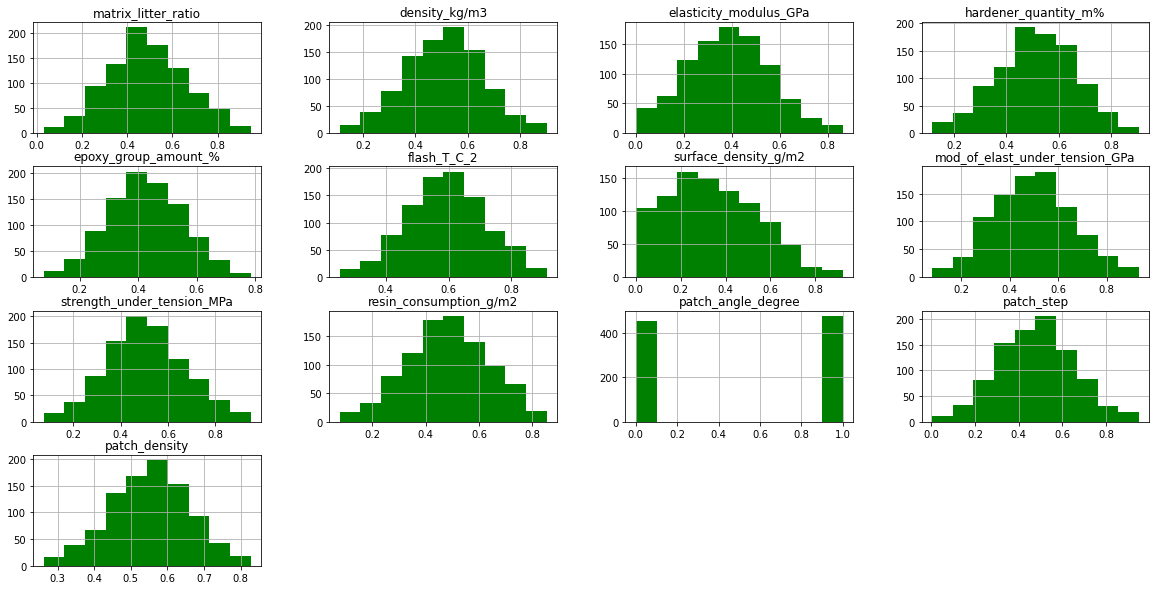

In [295]:
#Анализ данных без выбросов
data_scaled.hist(figsize=(20,10), color='green');

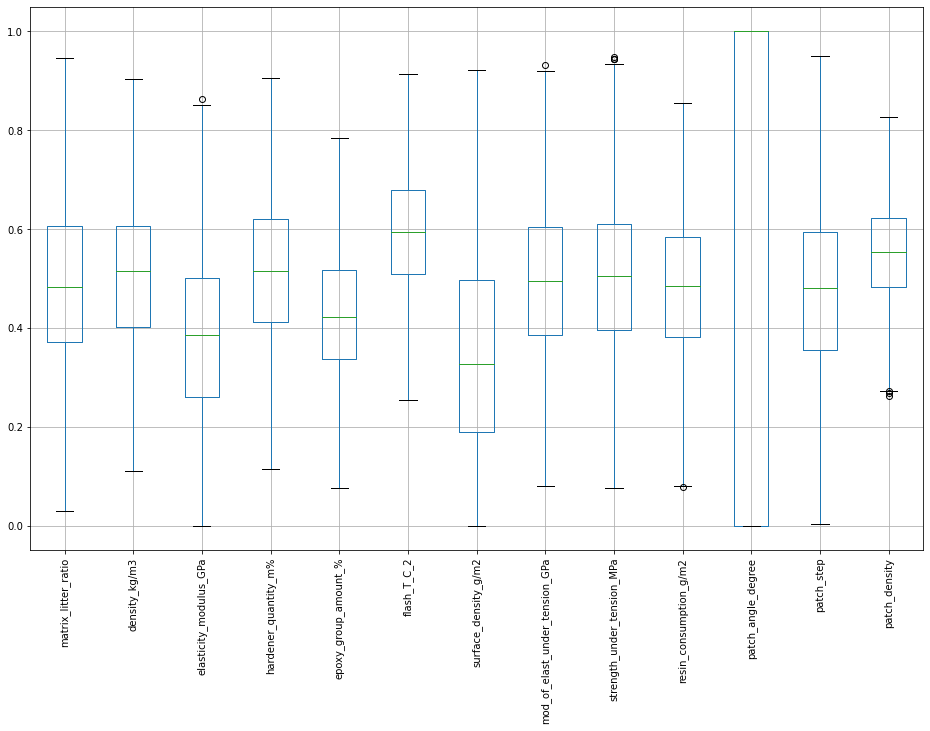

In [296]:
boxplot = data_scaled.boxplot(rot=90, figsize=(16,10))

In [297]:
data_scaled.corr(method ='pearson')

,matrix_litter_ratio,density_kg/m3,elasticity_modulus_GPa,hardener_quantity_m%,epoxy_group_amount_%,flash_T_С_2,surface_density_g/m2,mod_of_elast_under_tension_GPa,strength_under_tension_MPa,resin_consumption_g/m2,patch_angle_degree,patch_step,patch_density
matrix_litter_ratio,1.000000,0.001676,0.043888,0.007812,0.027587,-0.006275,0.007540,-0.019248,0.024488,0.075740,-0.035897,0.039109,0.052466
density_kg/m3,0.001676,1.000000,0.004326,-0.050210,-0.001065,-0.023507,0.062705,-0.021316,-0.076305,-0.005133,-0.051336,-0.045229,0.084077
elasticity_modulus_GPa,0.043888,0.004326,1.000000,0.036523,-0.013271,0.029318,-0.008987,0.021086,0.036641,0.004450,-0.021886,0.011345,0.078091
hardener_quantity_m%,0.007812,-0.050210,0.036523,1.000000,0.011330,0.072273,0.046211,-0.048208,-0.063256,-0.002268,0.026539,-0.021198,0.001485
epoxy_group_amount_%,0.027587,-0.001065,-0.013271,0.011330,1.000000,-0.019085,-0.013065,0.055271,-0.007097,0.011575,0.026645,0.004465,-0.036126
flash_T_С_2,-0.006275,-0.023507,0.029318,0.072273,-0.019085,1.000000,0.018884,0.015361,-0.004877,0.057693,0.001721,0.032580,-0.006801
surface_density_g/m2,0.007540,0.062705,-0.008987,0.046211,-0.013065,0.018884,1.000000,0.029643,-0.031777,-0.008295,0.045785,0.033065,-0.048670
mod_of_elast_under_tension_GPa,-0.019248,-0.021316,0.021086,-0.048208,0.055271,0.015361,0.029643,1.000000,-0.001422,0.055023,0.034193,-0.007546,0.013445
strength_under_tension_MPa,0.024488,-0.076305,0.036641,-0.063256,-0.007097,-0.004877,-0.031777,-0.001422,1.000000,0.027949,0.017669,-0.061219,0.016894
resin_consumption_g/m2,0.075740,-0.005133,0.004450,-0.002268,0.011575,0.057693,-0.008295,0.055023,0.027949,1.000000,-0.009916,0.007569,0.001448


In [298]:
#Создание датасетов для работы с моделями
data_elst = data_scaled.drop(['strength_under_tension_MPa'], axis = 1)
data_elst.head()

,matrix_litter_ratio,density_kg/m3,elasticity_modulus_GPa,hardener_quantity_m%,epoxy_group_amount_%,flash_T_С_2,surface_density_g/m2,mod_of_elast_under_tension_GPa,resin_consumption_g/m2,patch_angle_degree,patch_step,patch_density
1,0.282131,0.626533,0.385679,0.178021,0.506535,0.589311,0.149682,0.319194,0.488979,0.0,0.276998,0.576985
3,0.282131,0.626533,0.385679,0.613972,0.373167,0.638420,0.149682,0.319194,0.488979,0.0,0.346248,0.451971
4,0.457857,0.626533,0.393150,0.519387,0.427467,0.589311,0.149682,0.319194,0.488979,0.0,0.346248,0.548135
5,0.457201,0.563509,0.390531,0.519387,0.427467,0.589311,0.149682,0.319194,0.488979,0.0,0.346248,0.576985
6,0.419084,0.374437,0.421436,0.519387,0.427467,0.589311,0.149682,0.319194,0.488979,0.0,0.346248,0.673149


In [299]:
data_strg = data_scaled.drop(['mod_of_elast_under_tension_GPa'], axis = 1)
data_strg.head()

,matrix_litter_ratio,density_kg/m3,elasticity_modulus_GPa,hardener_quantity_m%,epoxy_group_amount_%,flash_T_С_2,surface_density_g/m2,strength_under_tension_MPa,resin_consumption_g/m2,patch_angle_degree,patch_step,patch_density
1,0.282131,0.626533,0.385679,0.178021,0.506535,0.589311,0.149682,0.698235,0.488979,0.0,0.276998,0.576985
3,0.282131,0.626533,0.385679,0.613972,0.373167,0.638420,0.149682,0.698235,0.488979,0.0,0.346248,0.451971
4,0.457857,0.626533,0.393150,0.519387,0.427467,0.589311,0.149682,0.698235,0.488979,0.0,0.346248,0.548135
5,0.457201,0.563509,0.390531,0.519387,0.427467,0.589311,0.149682,0.698235,0.488979,0.0,0.346248,0.576985
6,0.419084,0.374437,0.421436,0.519387,0.427467,0.589311,0.149682,0.698235,0.488979,0.0,0.346248,0.673149


In [300]:
x_elst = data_elst.drop(['mod_of_elast_under_tension_GPa'], axis = 1)
y_elst = data_elst.mod_of_elast_under_tension_GPa

In [301]:
x_strg = data_strg.drop(['strength_under_tension_MPa'], axis = 1)
y_strg = data_strg.strength_under_tension_MPa

In [302]:
x_elst_train, x_elst_test, y_elst_train, y_elst_test = train_test_split(x_elst, y_elst, test_size = 0.30, random_state=42)

In [303]:
x_strg_train, x_strg_test, y_strg_train, y_strg_test = train_test_split(x_strg, y_strg, test_size = 0.30, random_state=42)

In [374]:
#Линейная регрессия для модуля упругости при растяжении
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()
lin_reg.fit(x_elst_train, y_elst_train)

LinearRegression()

In [375]:
print('Train score:', lin_reg.score(x_elst_train, y_elst_train))

Train score: 0.014638488352723855


In [376]:
print('Test score:', lin_reg.score(x_elst_test, y_elst_test))

Test score: -0.003600587903080932


In [377]:
y_elst_pred = lin_reg.predict(x_elst_test).round(2)
data_lnreg = pd.DataFrame({'Actual': y_elst_test, 'Predicted': y_elst_pred})
data_lnreg.head()

,Actual,Predicted
359,0.739297,0.48
76,0.275260,0.51
232,0.390998,0.52
730,0.740940,0.51
759,0.338768,0.50


In [379]:
mse_lnreg_elast = mean_squared_error(y_elst_test, y_elst_pred)
print('MAE:', mean_absolute_error(y_elst_test, y_elst_pred))
print('MSE:', mse_lnreg_elast)
print('RMSE:', np.sqrt(mse_lnreg_elast)) 

MAE: 0.1299015489126572
MSE: 0.025269080337549862
RMSE: 0.15896251236549408


C:\Users\elena\AppData\Local\Temp/ipykernel_6716/870868055.py:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(y_elst_pred, 'r.', marker='*')


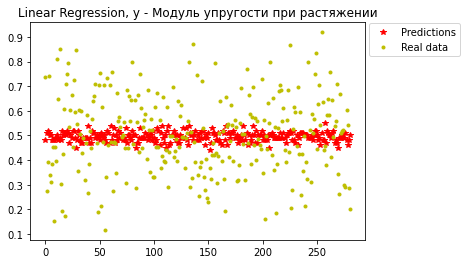

In [313]:
plt.plot(y_elst_pred, 'r.', marker='*')
plt.plot(y_elst_test.reset_index(drop=True),'y.')

plt.legend(['Predictions', 'Real data'],bbox_to_anchor=(1.3,1.02))
plt.title('Linear Regression, y - Модуль упругости при растяжении');

In [314]:
#Линейная регрессия для прочности при растяжении
lin_reg= LinearRegression()
lin_reg.fit(x_strg_train, y_strg_train)

LinearRegression()

In [315]:
print('Train score:', lin_reg.score(x_strg_train, y_strg_train))

Train score: 0.02473008160717549


In [316]:
print('Test score:', lin_reg.score(x_strg_test, y_strg_test))

Test score: -0.04544304605347382


In [317]:
y_strg_pred = lin_reg.predict(x_strg_test).round(2)
data_lnrg = pd.DataFrame({'Actual': y_strg_test, 'Predicted': y_strg_pred})
data_lnrg.head()

,Actual,Predicted
359,0.279700,0.46
76,0.611853,0.50
232,0.631015,0.52
730,0.557909,0.53
759,0.356651,0.49


In [318]:
mse_lnreg_strength = mean_squared_error(y_strg_test, y_strg_pred)
print('MAE:', mean_absolute_error(y_strg_test, y_strg_pred))
print('MSE:', mse_lnreg_strength)
print('RMSE:', np.sqrt(mse_lnreg_strength))

MAE: 0.12899267630966008
MSE: 0.026977563882065046
RMSE: 0.16424848213017082


C:\Users\elena\AppData\Local\Temp/ipykernel_6716/382745247.py:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "y." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(y_strg_pred, 'y.', marker='*')


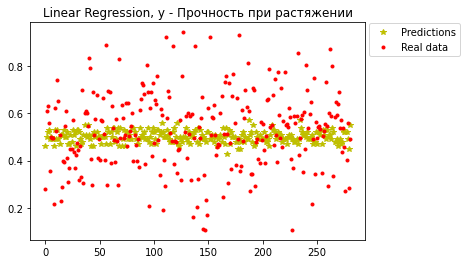

In [319]:
plt.plot(y_strg_pred, 'y.', marker='*')
plt.plot(y_strg_test.reset_index(drop=True),'r.')

plt.legend(['Predictions', 'Real data'],bbox_to_anchor=(1.3,1.02))
plt.title('Linear Regression, y - Прочность при растяжении');

In [320]:
test_results_elast = {}
test_results_elast['Linear model'] = np.sqrt(mse_lnreg_elast).round(3)
test_results_strength = {}
test_results_strength['Linear model'] = np.sqrt(mse_lnreg_strength).round(3)

In [321]:
#DecisionTreeRegressor
dtr = tree.DecisionTreeRegressor()

In [322]:
parameters = {
    'max_depth': [10, 15, 20, 25],
};

In [323]:
grid_search_dtr = GridSearchCV(estimator = dtr, param_grid = parameters)

In [324]:
#Модуль упругости при растяжении
grid_search_dtr.fit(x_elst_train, y_elst_train);

In [325]:
grid_search_dtr.best_params_

{'max_depth': 10}

In [326]:
print('Train score:',grid_search_dtr.score(x_elst_train, y_elst_train))

Train score: 0.511340789128116


In [327]:
print('Test score:',grid_search_dtr.score(x_elst_test, y_elst_test))

Test score: -0.5673950525361924


In [328]:
y_elst_pred = grid_search_dtr.predict(x_elst_test).round(2)

In [329]:
data_dtr = pd.DataFrame({'Actual': y_elst_test, 'Predicted': y_elst_pred})
data_dtr.head()

,Actual,Predicted
359,0.739297,0.50
76,0.275260,0.64
232,0.390998,0.35
730,0.740940,0.59
759,0.338768,0.42


In [330]:
mse_dtr_elast = mean_squared_error(y_elst_test, y_elst_pred)
print('MAE:', mean_absolute_error(y_elst_test, y_elst_pred))
print('MSE:', mse_dtr_elast)
print('RMSE:', np.sqrt(mse_dtr_elast)) 

MAE: 0.16265530333811093
MSE: 0.03942665394854298
RMSE: 0.198561461388012


C:\Users\elena\AppData\Local\Temp/ipykernel_6716/3917600328.py:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(y_elst_pred, 'g.', marker='*')


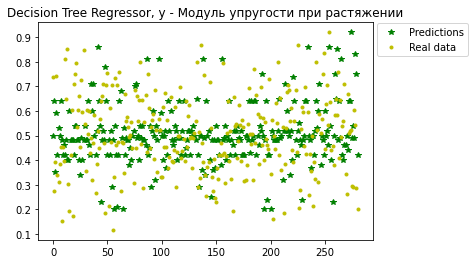

In [331]:
plt.plot(y_elst_pred, 'g.', marker='*')
plt.plot(y_elst_test.reset_index(drop=True),'y.')

plt.legend(['Predictions', 'Real data'],bbox_to_anchor=(1.3,1.02))
plt.title('Decision Tree Regressor, y - Модуль упругости при растяжении');

In [332]:
#Прочность при растяжении
dtr = tree.DecisionTreeRegressor()
parameters = {'max_depth': [10, 15, 20, 25],}
grid_search_dtr = GridSearchCV(estimator = dtr, param_grid = parameters)
grid_search_dtr.fit(x_strg_train, y_strg_train);

In [333]:
grid_search_dtr.best_params_

{'max_depth': 10}

In [334]:
print('Train score:', grid_search_dtr.score(x_strg_train, y_strg_train))

Train score: 0.7427154601830974


In [335]:
print('Test score:', grid_search_dtr.score(x_strg_test, y_strg_test))

Test score: -1.0086233273208625


In [336]:
y_strg_pred = grid_search_dtr.predict(x_strg_test).round(2)

In [381]:
data_dtr = pd.DataFrame({'Actual': y_strg_test, 'Predicted': y_strg_pred})
data_dtr.head()

,Actual,Predicted
359,0.279700,0.67
76,0.611853,0.56
232,0.631015,0.50
730,0.557909,0.56
759,0.356651,0.71


In [382]:
mse_dtr_strength = mean_squared_error(y_strg_test, y_strg_pred)
print('MAE:', mean_absolute_error(y_strg_test, y_strg_pred))
print('MSE:', mse_dtr_strength)
print('RMSE:', np.sqrt(mse_dtr_strength))

MAE: 0.1793008351464558
MSE: 0.05192813869918414
RMSE: 0.22787746421966376


C:\Users\elena\AppData\Local\Temp/ipykernel_6716/4206406100.py:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(y_strg_pred, 'r.', marker='*')


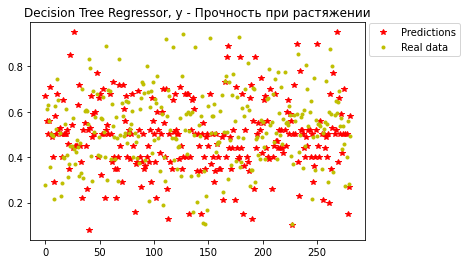

In [338]:
plt.plot(y_strg_pred, 'r.', marker='*')
plt.plot(y_strg_test.reset_index(drop=True),'y.')

plt.legend(['Predictions', 'Real data'],bbox_to_anchor=(1.3,1.02))
plt.title('Decision Tree Regressor, y - Прочность при растяжении');

In [339]:
test_results_elast['Decision Tree'] = np.sqrt(mse_dtr_elast).round(3)
test_results_strength['Decision Tree'] = np.sqrt(mse_dtr_strength).round(3)

In [394]:
#GradientBoostingRegressor
GBR = GradientBoostingRegressor()

In [395]:
parameters = {'n_estimators' : [100, 300, 500, 600, 700, 800, 900, 1000],
              'max_depth'    : [5, 10, 15, 20]
             }

In [396]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 10, n_jobs=-1)

In [397]:
grid_GBR.fit(x_elst_train, y_elst_train);

In [398]:
grid_GBR.best_params_

{'max_depth': 10, 'n_estimators': 100}

In [399]:
#Модуль упругости при растяжении
print('Train score:', grid_GBR.score(x_elst_train, y_elst_train))

Train score: 0.9985402407445119


In [400]:
print('Test score:', grid_GBR.score(x_elst_test, y_elst_test))

Test score: -0.1844927262938576


In [401]:
y_elst_pred = grid_GBR.predict(x_elst_test).round(2)
data_GBR = pd.DataFrame({'Actual': y_elst_test, 'Predicted': y_elst_pred})
data_GBR.head()

,Actual,Predicted
359,0.739297,0.51
76,0.275260,0.49
232,0.390998,0.40
730,0.740940,0.59
759,0.338768,0.39


In [402]:
mse_GBR_elast = mean_squared_error(y_elst_test, y_elst_pred)
print('MAE:', mean_absolute_error(y_elst_test, y_elst_pred))
print('MSE:', mse_GBR_elast)
print('RMSE:', np.sqrt(mse_GBR_elast))

MAE: 0.13790370498550475
MSE: 0.029801388682691197
RMSE: 0.17263078718088265


C:\Users\elena\AppData\Local\Temp/ipykernel_6716/150277557.py:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(y_elst_pred, 'b.', marker='*')


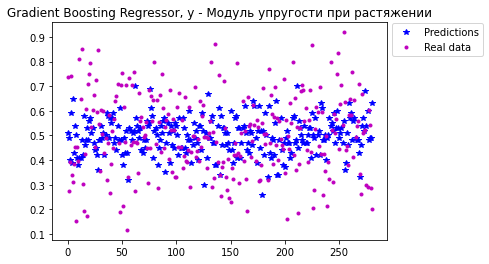

In [403]:
plt.plot(y_elst_pred, 'b.', marker='*')
plt.plot(y_elst_test.reset_index(drop=True),'m.')

plt.legend(['Predictions', 'Real data'],bbox_to_anchor=(1.3,1.02))
plt.title('Gradient Boosting Regressor, y - Модуль упругости при растяжении');

In [404]:
#Прочность при растяжении
GBR = GradientBoostingRegressor()
parameters = {'n_estimators' : [500, 600, 700, 800, 900, 1000],
              'max_depth'    : [5, 10, 15, 20]
             }
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 10, n_jobs=-1)
grid_GBR.fit(x_strg_train, y_strg_train)
grid_GBR.best_params_

{'max_depth': 5, 'n_estimators': 500}

In [405]:
print('Train score:', grid_GBR.score(x_strg_train, y_strg_train))

Train score: 0.9997799582621225


In [406]:
print('Test score:', grid_GBR.score(x_strg_test, y_strg_test))

Test score: -0.23379247263403058


In [407]:
y_strg_pred = grid_GBR.predict(x_strg_test).round(2)
data_GBR = pd.DataFrame({'Actual': y_strg_test, 'Predicted': y_strg_pred})
data_GBR.head()

,Actual,Predicted
359,0.279700,0.46
76,0.611853,0.48
232,0.631015,0.62
730,0.557909,0.52
759,0.356651,0.43


In [408]:
mse_GBR_strength = mean_squared_error(y_strg_test, y_strg_pred)
print('MAE:', mean_absolute_error(y_strg_test, y_strg_pred))
print('MSE:', mse_GBR_strength)
print('RMSE:', np.sqrt(mse_GBR_strength)) 

MAE: 0.14263810864002727
MSE: 0.03188992866569543
RMSE: 0.17857751444595546


C:\Users\elena\AppData\Local\Temp/ipykernel_6716/1516168286.py:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "m." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(y_strg_pred, 'm.', marker='*')


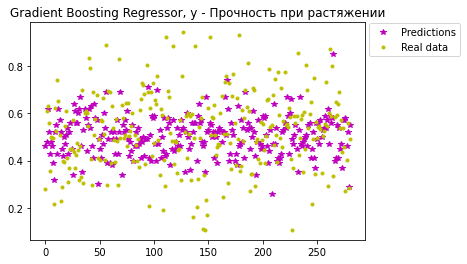

In [409]:
plt.plot(y_strg_pred, 'm.', marker='*')
plt.plot(y_strg_test.reset_index(drop=True),'y.')

plt.legend(['Predictions', 'Real data'],bbox_to_anchor=(1.3,1.02))
plt.title('Gradient Boosting Regressor, y - Прочность при растяжении');

In [410]:
test_results_elast['Gradient Boosting'] = np.sqrt(mse_GBR_elast).round(3)
test_results_strength['Gradient Boosting'] = np.sqrt(mse_GBR_strength).round(3)

In [411]:
pd.DataFrame(test_results_elast, index=['RMSE (Модуль упругости при растяжении)']).T

,RMSE (Модуль упругости при растяжении)
Linear model,0.159
Decision Tree,0.199
Gradient Boosting,0.173


In [412]:
pd.DataFrame(test_results_strength, index=['RMSE (Прочность при растяжении)']).T

,RMSE (Прочность при растяжении)
Linear model,0.164
Decision Tree,0.228
Gradient Boosting,0.179


In [359]:
#Нейронная сеть
x_mx = data_scaled.drop(['matrix_litter_ratio'], axis = 1)
y_mx = data_scaled.matrix_litter_ratio

In [462]:
x_train, x_test, y_train, y_test = train_test_split(x_mx, y_mx, test_size = 0.30, random_state=42)

In [463]:
x_train.shape

(655, 12)

In [464]:
x_test.shape

(281, 12)

In [520]:
model = Sequential([
    Dense(64, activation = 'relu', input_dim=12),
    Dense(32, activation = 'relu'),
    Dense(16, activation = 'relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam', 
              loss='mean_absolute_error')

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 64)                832       
                                                                 
 dense_52 (Dense)            (None, 32)                2080      
                                                                 
 dense_53 (Dense)            (None, 16)                528       
                                                                 
 dense_54 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,457
Trainable params: 3,457
Non-trainable params: 0
_________________________________________________________________


In [521]:
model.fit(x_train, y_train, batch_size=5, epochs=50)

Epoch 1/50
131/131 [==============================] - 1s 1ms/step - loss: 0.1403
Epoch 2/50
131/131 [==============================] - 0s 1ms/step - loss: 0.1399
Epoch 3/50
131/131 [==============================] - 0s 1ms/step - loss: 0.1396
Epoch 4/50
131/131 [==============================] - 0s 1ms/step - loss: 0.1394
Epoch 5/50
131/131 [==============================] - 0s 1ms/step - loss: 0.1395
Epoch 6/50
131/131 [==============================] - 0s 1ms/step - loss: 0.1396
Epoch 7/50
131/131 [==============================] - 0s 1ms/step - loss: 0.1389
Epoch 8/50
131/131 [==============================] - 0s 1ms/step - loss: 0.1391
Epoch 9/50
131/131 [==============================] - 0s 1ms/step - loss: 0.1389
Epoch 10/50
131/131 [==============================] - 0s 1ms/step - loss: 0.1374
Epoch 11/50
131/131 [==============================] - 0s 1ms/step - loss: 0.1402
Epoch 12/50
131/131 [==============================] - 0s 2ms/step - loss: 0.1390
Epoch 13/50
131/131 [====

In [522]:
history = model.fit(
    x_train,
    y_train,
    epochs=50,
    verbose=0,
    validation_split = 0.5)

In [523]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
45,0.104408,0.134315,45
46,0.103713,0.135648,46
47,0.103612,0.135413,47
48,0.102947,0.134997,48
49,0.101970,0.134799,49


In [524]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 0.5])
    plt.xlabel('Эпоха')
    plt.ylabel('MAE')
    plt.legend()
    plt.grid(True)

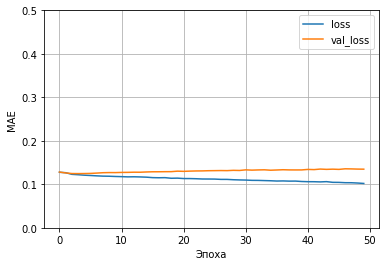

In [525]:
plot_loss(history)

In [526]:
y_pred =  model.predict(x_test) 

predicted_values = np.ravel(y_pred) 
actual_values = np.ravel(y_test) 
df_mx = pd.DataFrame({'Actual': actual_values, 'Predicted': predicted_values})
df_mx.head()

,Actual,Predicted
0,0.477124,0.650192
1,0.298062,0.525763
2,0.255733,0.435457
3,0.809922,0.383843
4,0.590345,0.419400


In [527]:
mse = mean_squared_error(y_test, y_pred)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mse)
print('RMSE:', np.sqrt(mse))

MAE: 0.15046980820580974
MSE: 0.03441192236356454
RMSE: 0.18550450766373452


C:\Users\elena\AppData\Local\Temp/ipykernel_6716/97108700.py:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(y_pred, 'r.', marker='*')


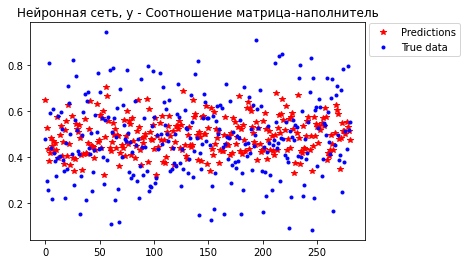

In [528]:
plt.plot(y_pred, 'r.', marker='*')
plt.plot(y_test.reset_index(drop=True),'b.')

plt.legend(['Predictions', 'True data'],bbox_to_anchor=(1.3,1.02))
plt.title('Нейронная сеть, y - Соотношение матрица-наполнитель');

In [529]:
model.save('analyse_composite')

INFO:tensorflow:Assets written to: analyse_composite\assets


In [151]:
!pip install flask

In [179]:
from flask import Flask, request, render_template

In [180]:
app = Flask(__name__)

In [ ]:
def predict(a, b, c, d, e, f):
    model = keras.models.load_model('./keras_models/analyse_composite')
    data = [[a, b, c, d, e, f]]
    return f'predicted value: {model.predict(data)}'